In [38]:
import pandas as pd
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import plotly.express as px
import os
import plotly.io as pio

In [4]:
#load for excel file
df = pd.read_excel("zomato.xlsx")

In [9]:
df.head()

,DATE AND TIME,REVIEW,RATING SCORE,Theme
0,2024-02-26 08:20:04,Good,5,Service Experience
1,2024-02-26 08:14:25,"Worst website. The food delivery was delayed, ...",1,Service Experience
2,2024-02-26 08:08:56,Excellent,5,Service Experience
3,2024-02-26 08:08:53,Good service,4,Service Experience
4,2024-02-26 08:08:32,Fantastic,5,Service Experience


In [11]:
## convert 'review' to string
df = df.copy()
df['REVIEW'] = df['REVIEW'].astype(str).fillna("")

In [12]:
## function for subectivity
def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [13]:
# now polarity
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [30]:
# create new columns for them
df['subjectivity'] = df['REVIEW'].apply(subjectivity)
df['polarity'] = df['REVIEW'].apply(polarity)
df['sentiment'] = df['polarity'].apply(sentiment_label)

In [31]:
## analysis for positive,negative and neutral reviews
def sentiment_label(score):
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'
df['sentiment'] = df['polarity'].apply(sentiment_label)

In [32]:
df.head()

,DATE AND TIME,REVIEW,RATING SCORE,Theme,subjectivity,polarity,sentiment,sentiment_score,review_length,word_count
0,2024-02-26 08:20:04,Good,5,Service Experience,0.60,0.7,positive,0.85,4,1
1,2024-02-26 08:14:25,"Worst website. The food delivery was delayed, ...",1,Service Experience,0.55,-0.5,negative,0.25,227,40
2,2024-02-26 08:08:56,Excellent,5,Service Experience,1.00,1.0,positive,1.00,9,1
3,2024-02-26 08:08:53,Good service,4,Service Experience,0.60,0.7,positive,0.85,12,2
4,2024-02-26 08:08:32,Fantastic,5,Service Experience,0.90,0.4,positive,0.70,9,1


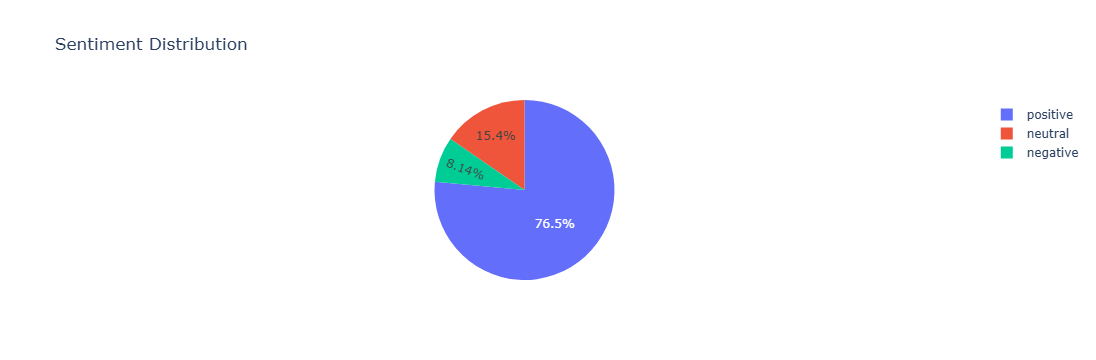

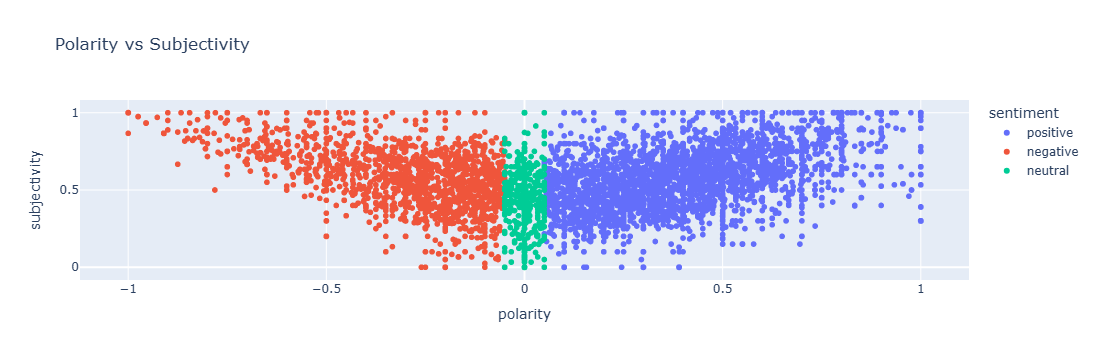

In [33]:
import plotly.express as px

# Pie chart of sentiment distribution
fig = px.pie(df, names='sentiment', title='Sentiment Distribution')
fig.show()

# Scatter plot: polarity vs. subjectivity
fig = px.scatter(df, x='polarity', y='subjectivity', color='sentiment',
                 title='Polarity vs Subjectivity')
fig.show()


In [34]:
## subjectivity meand more personals than factual
## how extreme the  opinioin is

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['sentiment_score'] = scaler.fit_transform(df[['polarity']])


In [36]:
df.head()

,DATE AND TIME,REVIEW,RATING SCORE,Theme,subjectivity,polarity,sentiment,sentiment_score,review_length,word_count
0,2024-02-26 08:20:04,Good,5,Service Experience,0.60,0.7,positive,0.85,4,1
1,2024-02-26 08:14:25,"Worst website. The food delivery was delayed, ...",1,Service Experience,0.55,-0.5,negative,0.25,227,40
2,2024-02-26 08:08:56,Excellent,5,Service Experience,1.00,1.0,positive,1.00,9,1
3,2024-02-26 08:08:53,Good service,4,Service Experience,0.60,0.7,positive,0.85,12,2
4,2024-02-26 08:08:32,Fantastic,5,Service Experience,0.90,0.4,positive,0.70,9,1


In [40]:
# Create output folder
output_dir = "sentiment_dashboard_html"
os.makedirs(output_dir, exist_ok=True)

# 1. Pie Chart - Sentiment Distribution
fig1 = px.pie(df, names='sentiment', title='Sentiment Distribution')
pio.write_html(fig1, file=os.path.join(output_dir, "sentiment_pie.html"), full_html=True)

# 2. Line Chart - Positive Sentiment Over Time
df['date_only'] = df['DATE AND TIME'].dt.date
pos_trend = df[df['sentiment'] == 'positive'].groupby('date_only').size().reset_index(name='count')
fig2 = px.line(pos_trend, x='date_only', y='count', title='Positive Sentiment Over Time')
pio.write_html(fig2, file=os.path.join(output_dir, "positive_trend.html"), full_html=True)

# 3. Line Chart - negative Sentiment Over Time
df['date_only'] = df['DATE AND TIME'].dt.date
neg_trend = df[df['sentiment'] == 'negative'].groupby('date_only').size().reset_index(name='count')
fig3 = px.line(neg_trend, x='date_only', y='count', title='Negative Sentiment Over Time')
pio.write_html(fig3, file=os.path.join(output_dir, "negative_trend.html"), full_html=True)

# 4. Line Chart - neutralSentiment Over Time
df['date_only'] = df['DATE AND TIME'].dt.date
neu_trend = df[df['sentiment'] == 'neutral'].groupby('date_only').size().reset_index(name='count')
fig4 = px.line(neu_trend, x='date_only', y='count', title='Neutral Sentiment Over Time')
pio.write_html(fig4, file=os.path.join(output_dir, "neutral_trend.html"), full_html=True)

# 5. Bar Chart - Avg Polarity by Theme
avg_theme = df.groupby('Theme')['polarity'].mean().reset_index()
fig5 = px.bar(avg_theme, x='Theme', y='polarity', title='Average Polarity by Theme')
pio.write_html(fig5, file=os.path.join(output_dir, "theme_polarity.html"), full_html=True)

# 6. Scatter Plot - Polarity vs Subjectivity
fig6 = px.scatter(df, x='polarity', y='subjectivity', color='sentiment',
                  title='Polarity vs Subjectivity')
pio.write_html(fig6, file=os.path.join(output_dir, "scatter_sentiment.html"), full_html=True)

print(f" All HTML charts saved in: {output_dir}")

 All HTML charts saved in: sentiment_dashboard_html


In [43]:
html_content = '''
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Zomato Sentiment Dashboard</title>
    <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.3.0/dist/css/bootstrap.min.css" rel="stylesheet">
    <style>
        iframe {
            width: 100%;
            height: 600px;
            border: none;
        }
    </style>
</head>
<body>
<div class="container my-4">
    <h1 class="text-center mb-4">Zomato Sentiment Dashboard</h1>

    <ul class="nav nav-tabs" id="chartTabs" role="tablist">
        <li class="nav-item"><button class="nav-link active" data-bs-toggle="tab" data-bs-target="#pie">Sentiment Pie</button></li>
        <li class="nav-item"><button class="nav-link" data-bs-toggle="tab" data-bs-target="#pos">Positive Trend</button></li>
        <li class="nav-item"><button class="nav-link" data-bs-toggle="tab" data-bs-target="#neg">Negative Trend</button></li>
        <li class="nav-item"><button class="nav-link" data-bs-toggle="tab" data-bs-target="#neu">Neutral Trend</button></li>
        <li class="nav-item"><button class="nav-link" data-bs-toggle="tab" data-bs-target="#theme">Polarity by Theme</button></li>
        <li class="nav-item"><button class="nav-link" data-bs-toggle="tab" data-bs-target="#scatter">Polarity vs Subjectivity</button></li>
    </ul>

    <div class="tab-content mt-3">
        <div class="tab-pane fade show active" id="pie" role="tabpanel">
            <iframe src="sentiment_pie.html"></iframe>
        </div>
        <div class="tab-pane fade" id="pos" role="tabpanel">
            <iframe src="positive_trend.html"></iframe>
        </div>
        <div class="tab-pane fade" id="neg" role="tabpanel">
            <iframe src="negative_trend.html"></iframe>
        </div>
        <div class="tab-pane fade" id="neu" role="tabpanel">
            <iframe src="neutral_trend.html"></iframe>
        </div>
        <div class="tab-pane fade" id="theme" role="tabpanel">
            <iframe src="theme_polarity.html"></iframe>
        </div>
        <div class="tab-pane fade" id="scatter" role="tabpanel">
            <iframe src="scatter_sentiment.html"></iframe>
        </div>
    </div>
</div>

<script src="https://cdn.jsdelivr.net/npm/bootstrap@5.3.0/dist/js/bootstrap.bundle.min.js"></script>
</body>
</html>
'''

# Save it to your output folder
with open("sentiment_dashboard_html/dashboard.html", "w", encoding="utf-8") as f:
    f.write(html_content)

print("✅ Dashboard HTML saved as: sentiment_dashboard_html/dashboard.html")


✅ Dashboard HTML saved as: sentiment_dashboard_html/dashboard.html


In [45]:
## creating dasboard app script
import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html, Input, Output

# Load preprocessed data
df['DATE AND TIME'] = pd.to_datetime(df['DATE AND TIME'], errors='coerce')
df['date_only'] = df['DATE AND TIME'].dt.date

# Dash app
app = Dash(__name__)
app.title = "Zomato Sentiment Dashboard"

app.layout = html.Div([
    html.H1("📊 Zomato Sentiment Dashboard", style={'textAlign': 'center'}),

    dcc.Tabs([
        dcc.Tab(label='Sentiment Pie', children=[
            dcc.Graph(figure=px.pie(df, names='sentiment', title='Sentiment Distribution'))
        ]),
        dcc.Tab(label='Positive Sentiment Trend', children=[
            dcc.Graph(figure=px.line(df[df['sentiment'] == 'positive'].groupby('date_only').size().reset_index(name='count'),
                                     x='date_only', y='count', title='Positive Sentiment Over Time'))
        ]),
        dcc.Tab(label='Negative Sentiment Trend', children=[
            dcc.Graph(figure=px.line(df[df['sentiment'] == 'negative'].groupby('date_only').size().reset_index(name='count'),
                                     x='date_only', y='count', title='Negative Sentiment Over Time'))
        ]),
        dcc.Tab(label='Neutral Sentiment Trend', children=[
            dcc.Graph(figure=px.line(df[df['sentiment'] == 'neutral'].groupby('date_only').size().reset_index(name='count'),
                                     x='date_only', y='count', title='Neutral Sentiment Over Time'))
        ]),
        dcc.Tab(label='Polarity by Theme', children=[
            dcc.Graph(figure=px.bar(df.groupby('Theme')['polarity'].mean().reset_index(),
                                    x='Theme', y='polarity', title='Average Polarity by Theme'))
        ]),
        dcc.Tab(label='Polarity vs Subjectivity', children=[
            dcc.Graph(figure=px.scatter(df, x='polarity', y='subjectivity', color='sentiment',
                                        title='Polarity vs Subjectivity'))
        ]),
    ])
])

if __name__ == '__main__':
    app.run(debug=True)
